In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

In [4]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('/Users/abraryaser/Desktop/datasets/ieee-fraud-detection/train_transaction.csv')
df.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
for col, values in df.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 590540
[2987000 2987001 2987002 ... 3577537 3577538 3577539]


isFraud: 2
[0 1]


TransactionDT: 573349
[   86400    86401    86469 ... 15811079 15811088 15811131]


TransactionAmt: 20902
[  68.5    29.     59.   ...  557.54 1659.95  400.78]


ProductCD: 5
['W' 'H' 'C' 'S' 'R']


card1: 13553
[13926  2755  4663 ... 13166  8767 18038]


card2: 500
[ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 561. 387. 411. 392. 203. 297. 136. 27

In [26]:
feature_list = ['isFraud', 'card4', 'card6', 'TransactionAmt','ProductCD', 'P_emaildomain','R_emaildomain', 'addr2']
target = 'isFraud'
# Categorical features
cat = ['ProductCD', 'P_emaildomain','R_emaildomain', 'card4', 'card6', 'addr2']
# Numeric features
num = ['TransactionAmt']


In [27]:
temp = df[feature_list]
temp

,isFraud,card4,card6,TransactionAmt,ProductCD,P_emaildomain,R_emaildomain,addr2
0,0,discover,credit,68.50,W,NaN,NaN,87.0
1,0,mastercard,credit,29.00,W,gmail.com,NaN,87.0
2,0,visa,debit,59.00,W,outlook.com,NaN,87.0
3,0,mastercard,debit,50.00,W,yahoo.com,NaN,87.0
4,0,mastercard,credit,50.00,H,gmail.com,NaN,87.0
...,...,...,...,...,...,...,...,...
590535,0,visa,debit,49.00,W,NaN,NaN,87.0
590536,0,mastercard,debit,39.50,W,gmail.com,NaN,87.0
590537,0,mastercard,debit,30.95,W,gmail.com,NaN,87.0
590538,0,mastercard,debit,117.00,W,aol.com,NaN,87.0


In [28]:
temp = temp.dropna()
temp

,isFraud,card4,card6,TransactionAmt,ProductCD,P_emaildomain,R_emaildomain,addr2
93,0,visa,credit,50.0,H,charter.net,charter.net,87.0
99,0,visa,credit,75.0,R,gmail.com,gmail.com,87.0
108,0,visa,debit,150.0,H,gmail.com,gmail.com,87.0
119,0,american express,credit,100.0,H,anonymous.com,anonymous.com,87.0
141,0,visa,debit,200.0,R,anonymous.com,anonymous.com,87.0
...,...,...,...,...,...,...,...,...
590451,0,american express,credit,200.0,R,gmail.com,gmail.com,87.0
590465,0,american express,credit,250.0,R,me.com,anonymous.com,87.0
590506,0,mastercard,credit,200.0,H,anonymous.com,gmail.com,87.0
590526,1,visa,credit,250.0,R,gmail.com,gmail.com,87.0


In [29]:
features = temp[cat]
features = pd.get_dummies(features)
features

,addr2,ProductCD_C,ProductCD_H,ProductCD_R,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,...,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit
93,87.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
99,87.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
108,87.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
119,87.0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
141,87.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590451,87.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
590465,87.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
590506,87.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
590526,87.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [30]:
features['TransactionAmt'] = temp['TransactionAmt']
features

,addr2,ProductCD_C,ProductCD_H,ProductCD_R,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,...,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,TransactionAmt
93,87.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,50.0
99,87.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,75.0
108,87.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,150.0
119,87.0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,100.0
141,87.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590451,87.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,200.0
590465,87.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,250.0
590506,87.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,200.0
590526,87.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,250.0


In [31]:
features['isFraud'] = temp['isFraud']
features

,addr2,ProductCD_C,ProductCD_H,ProductCD_R,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,...,R_emaildomain_ymail.com,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,TransactionAmt,isFraud
93,87.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,50.0,0
99,87.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,75.0,0
108,87.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,150.0,0
119,87.0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,100.0,0
141,87.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,200.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590451,87.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,200.0,0
590465,87.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,250.0,0
590506,87.0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,200.0,0
590526,87.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,250.0,1


In [32]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['isFraud'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('isFraud', axis = 1)

# Saving feature names for later use
feature_x = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [33]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [34]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (47289, 130)
Training Labels Shape: (47289,)
Testing Features Shape: (15764, 130)
Testing Labels Shape: (15764,)


In [35]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=42)

# fit the model

rfc.fit(train_features, train_labels)

# Predict the Test set results

label_pred = rfc.predict(test_features)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(test_labels, label_pred)))

Model accuracy score with 10 decision-trees : 0.9579


In [36]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, label_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     15007
           1       0.65      0.27      0.38       757

    accuracy                           0.96     15764
   macro avg       0.81      0.63      0.68     15764
weighted avg       0.95      0.96      0.95     15764



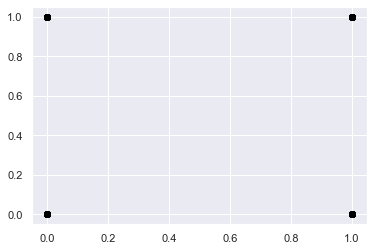

In [51]:
plt.scatter(x=test_labels, y=label_pred,color='black')  #The X-Features vs. The Real Label
# plt.plot(test_features, label_pred,color='blue') #The X- Features vs. The predicted label
# plt.show()#To show your figures code here